# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [44]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    # if (i % 50 == 0 and i >= 50):
    #     set_count += 1
    #     record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'q=' + city + '&appid=' + weather_api_key + '&units=' + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['timezone']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | haiku-pauwela
Processing Record 3 of Set 1 | kosmach
Processing Record 4 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | mendarda
Processing Record 9 of Set 1 | dakhla
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | morehead city
Processing Record 12 of Set 1 | dudinka
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | plastun
Processing Record 15 of Set 1 | bulayevo
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | trujillo
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | udachny
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | spanish wells
Processing Record 22 of Set 1

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saldanha,-33.0117,17.9442,15.67,84,15,4.06,ZA,7200
1,haiku-pauwela,20.9219,-156.3051,25.02,73,0,2.06,US,-36000
2,kosmach,48.7509,24.3673,12.03,74,100,3.18,UA,10800
3,iqaluit,63.7506,-68.5145,-2.39,79,100,4.92,CA,-14400
4,edinburgh of the seven seas,-37.0676,-12.3116,12.20,59,95,3.04,SH,0


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saldanha,-33.0117,17.9442,15.67,84,15,4.06,ZA,7200
1,haiku-pauwela,20.9219,-156.3051,25.02,73,0,2.06,US,-36000
2,kosmach,48.7509,24.3673,12.03,74,100,3.18,UA,10800
3,iqaluit,63.7506,-68.5145,-2.39,79,100,4.92,CA,-14400
4,edinburgh of the seven seas,-37.0676,-12.3116,12.20,59,95,3.04,SH,0


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

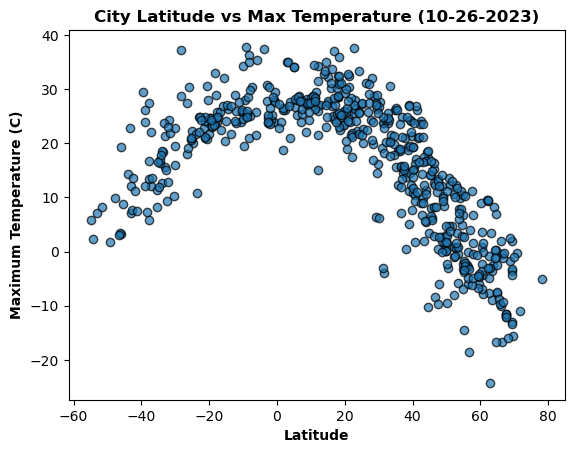

In [40]:
# Build scatter plot for latitude vs. temperature
temp_values = city_data_df['Max Temp']
lat_values = city_data_df['Lat']

plt.scatter(lat_values, temp_values, marker='o', alpha=0.70, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude', fontdict={'weight':'bold'})
plt.ylabel('Maximum Temperature (C)', fontdict={'weight':'bold'})
plt.title('City Latitude vs Max Temperature (10-26-2023)', fontdict={'weight':'bold',
                                                                    'size':'12'})

# Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

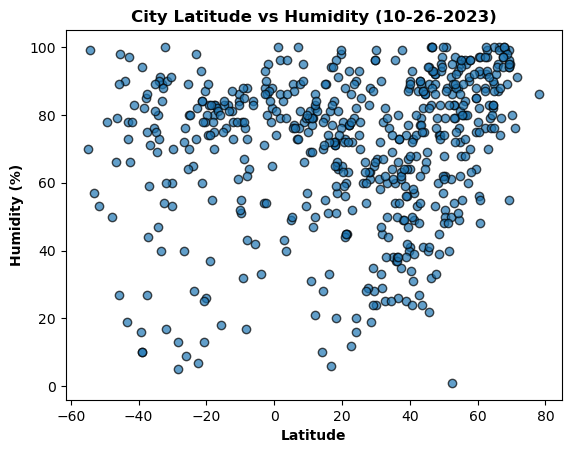

In [38]:
# Build the scatter plots for latitude vs. humidity
humidity_values = city_data_df['Humidity']

plt.scatter(lat_values, humidity_values, marker='o', alpha=0.70, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude', fontdict={'weight':'bold'})
plt.ylabel('Humidity (%)', fontdict={'weight':'bold'})
plt.title('City Latitude vs Humidity (10-26-2023)', fontdict={'weight':'bold',
                                                                    'size':'12'})

# Save the figure
plt.savefig("output_data/Fig2.png")

# # Show plot
plt.show()

#### Latitude Vs. Cloudiness

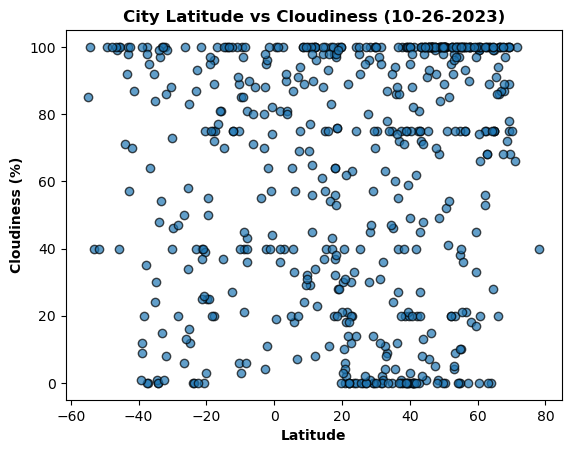

In [36]:
# Build the scatter plots for latitude vs. cloudiness
cloudy_values = city_data_df['Cloudiness']

plt.scatter(lat_values, cloudy_values, marker='o', alpha=0.70, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude', fontdict={'weight':'bold'})
plt.ylabel('Cloudiness (%)', fontdict={'weight':'bold'})
plt.title('City Latitude vs Cloudiness (10-26-2023)', fontdict={'weight':'bold',
                                                                    'size':'12'})
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

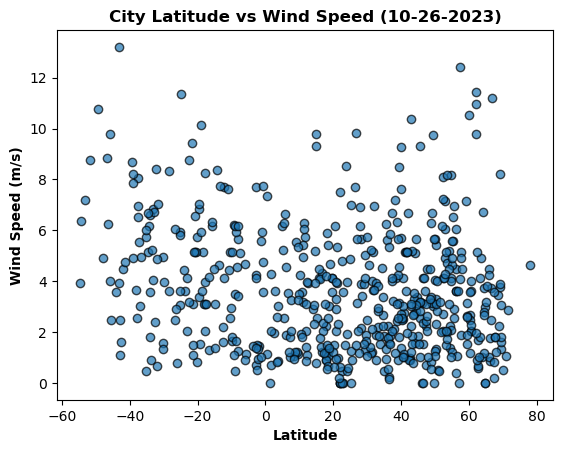

In [39]:
# Build the scatter plots for latitude vs. wind speed
wind_values = city_data_df['Wind Speed']

plt.scatter(lat_values, wind_values, marker='o', alpha=0.70, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude', fontdict={'weight':'bold'})
plt.ylabel('Wind Speed (m/s)', fontdict={'weight':'bold'})
plt.title('City Latitude vs Wind Speed (10-26-2023)', fontdict={'weight':'bold',
                                                                    'size':'12'})

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [72]:
# Define a function to create Linear Regression plots
def linear_regression_model(x, y, title, x_label, y_label):

    # First perform the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    # Calculate and print the y = mx + b line
    regress_line = x * slope + intercept 
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    # Create the scatter plot of the data
    plt.scatter(x, y, color='steelblue', linewidth=2)

    # Plot the linear regression line
    plt.plot(x, regress_line, color='crimson')

    # Set plot labels, line equation, and title 
    plt.xlabel(x_label, fontdict={'weight':'bold'})
    plt.ylabel(y_label, fontdict={'weight':'bold'})
    plt.title(title, fontdict={'weight':'bold', 'fontsize':'12'})
    plt.annotate(line_eq, (5.8,0.8), fontsize=15, color='crimson')

    # Print the r-value
    print(f'The r-squared is: {rvalue**2}')
    # Show the plot
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,haiku-pauwela,20.9219,-156.3051,25.02,73,0,2.06,US,-36000
2,kosmach,48.7509,24.3673,12.03,74,100,3.18,UA,10800
3,iqaluit,63.7506,-68.5145,-2.39,79,100,4.92,CA,-14400
6,mendarda,21.3167,70.4333,25.91,60,2,2.31,IN,19800
7,dakhla,23.6848,-15.9580,22.27,79,0,8.51,EH,3600


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saldanha,-33.0117,17.9442,15.67,84,15,4.06,ZA,7200
4,edinburgh of the seven seas,-37.0676,-12.3116,12.20,59,95,3.04,SH,0
5,adamstown,-25.0660,-130.1015,22.25,80,83,5.95,PN,-28800
8,lebu,-37.6167,-73.6500,13.37,75,100,6.96,CL,-10800
11,waitangi,-43.9535,-176.5597,14.34,90,71,3.58,NZ,49500


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7414476300144113


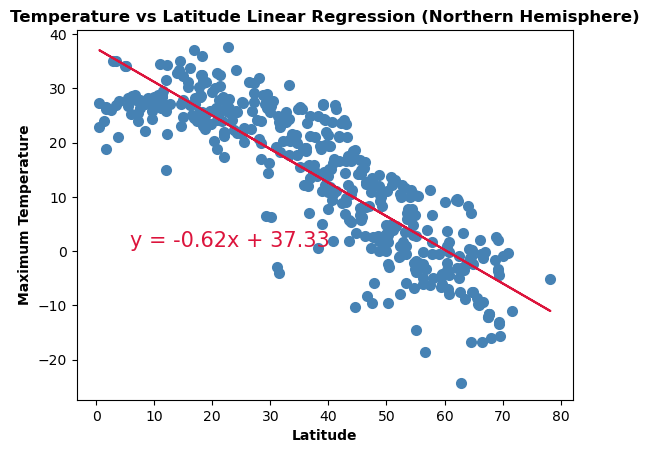

In [73]:
# Linear regression on Northern Hemisphere
# Set the northern x and y values
northern_lat = northern_hemi_df['Lat']
northern_temp = northern_hemi_df['Max Temp']

# Put the values into the linear regression model 
linear_regression_model(northern_lat, northern_temp, 'Temperature vs Latitude Linear Regression (Northern Hemisphere)', 'Latitude', 'Maximum Temperature')

The r-squared is: 0.5669540365068972


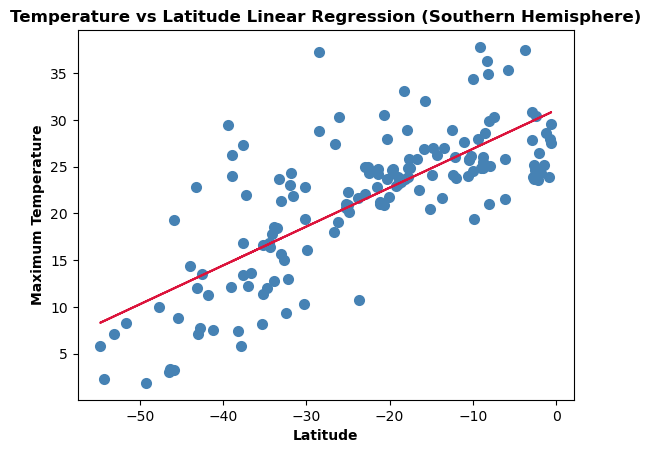

In [74]:
# Linear regression on Southern Hemisphere
# Set the southern x and y values
southern_lat = southern_hemi_df['Lat']
southern_temp = southern_hemi_df['Max Temp'] 

linear_regression_model(southern_lat, southern_temp, 'Temperature vs Latitude Linear Regression (Southern Hemisphere)', 'Latitude', 'Maximum Temperature')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0574119282523304


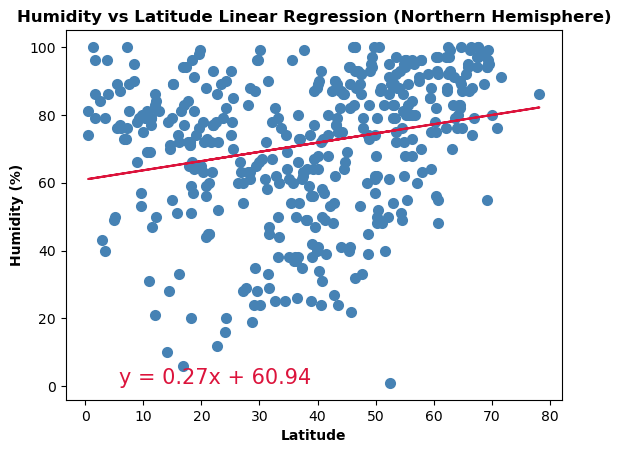

In [75]:
# Northern Hemisphere
# Set the y variable for humidity 
northern_humid = northern_hemi_df['Humidity']

# Pass into the linear regression model
linear_regression_model(northern_lat, northern_humid, 'Humidity vs Latitude Linear Regression (Northern Hemisphere)', 'Latitude', 'Humidity (%)')

The r-squared is: 0.010998600920854109


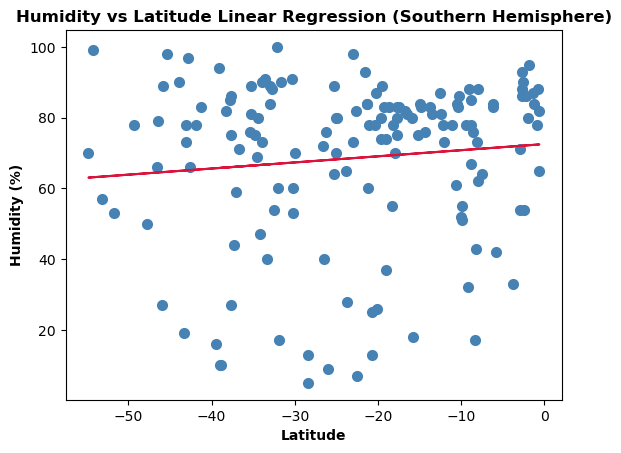

In [76]:
# Southern Hemisphere
# Set the y variable for humidity 
southern_humid = southern_hemi_df['Humidity']

# Pass into linear regression model
linear_regression_model(southern_lat, southern_humid, 'Humidity vs Latitude Linear Regression (Southern Hemisphere)', 'Latitude', 'Humidity (%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.037444390394328314


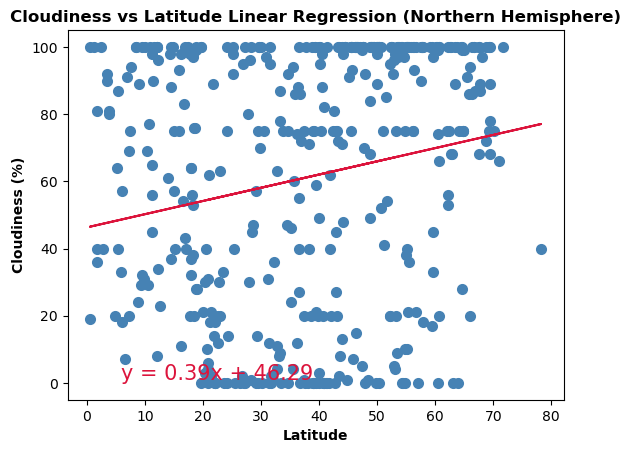

In [77]:
# Northern Hemisphere
# Set the y variable for cloudiness
northern_cloud = northern_hemi_df['Cloudiness']

# Pass into linear regression model
linear_regression_model(northern_lat, northern_cloud, 'Cloudiness vs Latitude Linear Regression (Northern Hemisphere)', 'Latitude', 'Cloudiness (%)')

The r-squared is: 8.630080126381472e-06


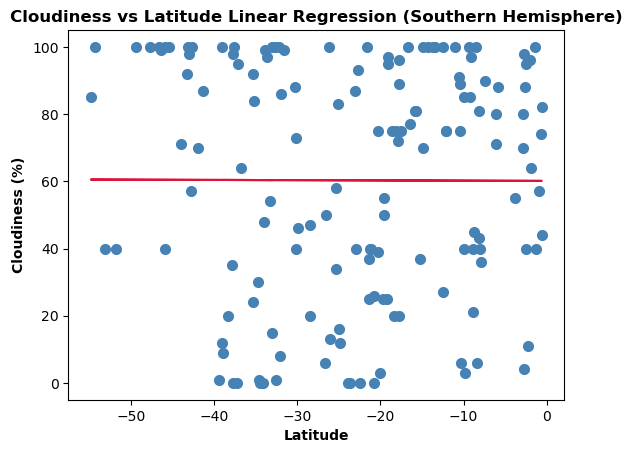

In [78]:
# Southern Hemisphere
# Set the y variable for cloudiness
southern_cloud = southern_hemi_df['Cloudiness']

# Pass into linear regression model
linear_regression_model(southern_lat, southern_cloud, 'Cloudiness vs Latitude Linear Regression (Southern Hemisphere)', 'Latitude', 'Cloudiness (%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.005352055469481336


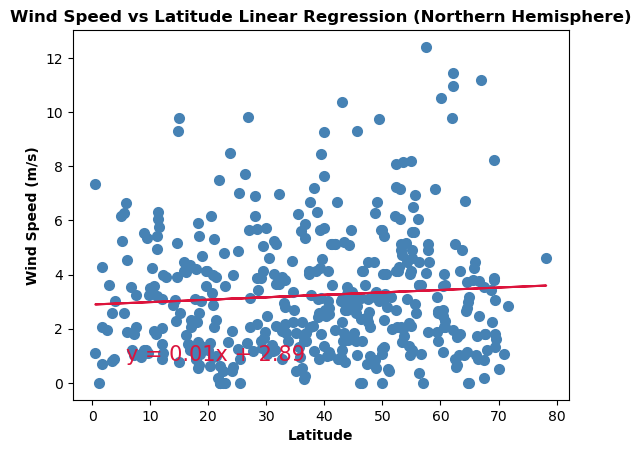

In [79]:
# Northern Hemisphere
# Set the y variable for wind speed
northern_wind = northern_hemi_df['Wind Speed']

# Pass into the linear regression model
linear_regression_model(northern_lat, northern_wind, 'Wind Speed vs Latitude Linear Regression (Northern Hemisphere)', 'Latitude', 'Wind Speed (m/s)')

The r-squared is: 0.08531180483596477


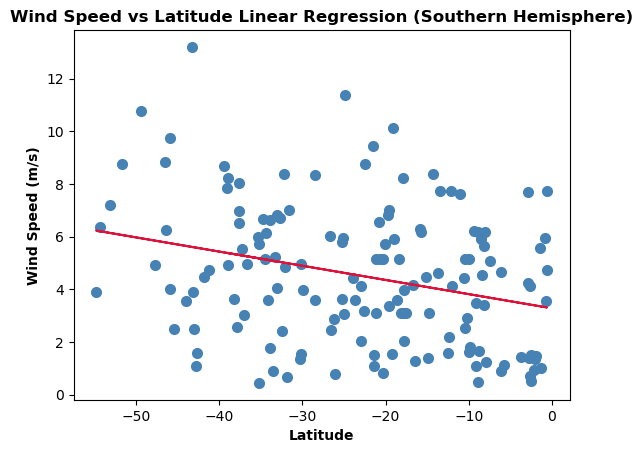

In [80]:
# Southern Hemisphere
# Set the y variable for wind speed
southern_wind = southern_hemi_df['Wind Speed']

# Pass into the linear regression model
linear_regression_model(southern_lat, southern_wind, 'Wind Speed vs Latitude Linear Regression (Southern Hemisphere)', 'Latitude', 'Wind Speed (m/s)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE